In [18]:
import networkx as nx
import pandas as pd 
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
df = pd.read_excel("glycolysis.xlsx")
df.head(5)

,reactant,enzyme,product,flux
0,glucose,hexokinase,glucose-6-phosphate,0.01
1,glucose-6-phosphate,phosphoglucose isomerase,fructose-6-phosphate,0.01
2,fructose-6-phosphate,phosphofructo-kinase,"fructose-1,6-bisphosphate",0.01
3,"fructose-1,6-bisphosphate",fructose biphosphate adolase,pyruvate,0.01
4,pyruvate,NaN,NaN,NaN


In [36]:
G = nx.Graph()

{('glucose', 'glucose-6-phosphate'): 0.01, ('glucose-6-phosphate', 'fructose-6-phosphate'): 0.01, ('fructose-6-phosphate', 'fructose-1,6-bisphosphate'): 0.01, ('fructose-1,6-bisphosphate', 'pyruvate'): 0.01}


{('glucose', 'glucose-6-phosphate'): Text(0.0, 0.5, 'hexokinase, flux=0.01'),
 ('glucose-6-phosphate',
  'fructose-6-phosphate'): Text(-0.3075880412645364, 0.42926944144434287, 'phosphoglucose isomerase, flux=0.01'),
 ('fructose-6-phosphate',
  'fructose-1,6-bisphosphate'): Text(-0.6788494732448407, 0.25182118044143803, 'phosphofructo-kinase, flux=0.01'),
 ('fructose-1,6-bisphosphate',
  'pyruvate'): Text(-0.5472602621964437, -0.16438229135840282, 'fructose biphosphate adolase, flux=0.01')}

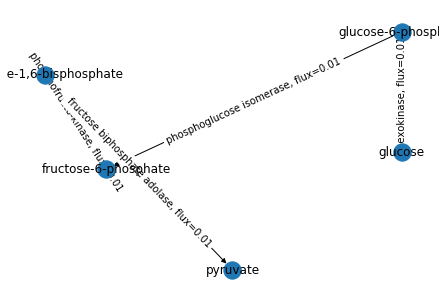

In [59]:
# have to add the enzymes as attributes and not weights 
# THE WEIGHTS CAN BE THE FLUXES SO WE WILL KNOW THE RELATIONSHIP BETWEEN THE NODES!!!
# add directed edges in shell composition 
# use for loops for the edges 

G = nx.DiGraph()
L = nx.line_graph(G)

node_list = df.reactant
weight_list = df.flux

# do for loop for the edge_list
# edge_list = [("glucose", "glucose-6-phosphate", weight_list[0]), ("glucose-6-phosphate", "fructose-6-phosphate", weight_list[1]), ("fructose-6-phosphate", "fructose-1,6-bisphosphate", weight_list[2])]

G.add_nodes_from(node_list)
# G.add_weighted_edges_from(edge_list)




# G.add_edge("glucose", "glucose-6-phosphate", weight = weight_list[0])
for a, reactant in enumerate(node_list):
    reactant = node_list[a]
    if (a != len(node_list) -1):
        G.add_edge(node_list[a], node_list[a+1], weight = weight_list[a], attribute_1=df.enzyme[a], attribute_2 = df.flux[a])
    


position = nx.spring_layout(G)
#nx.draw(G, position, with_labels = True)              
               
print(nx.get_edge_attributes(G, "weight"))



enzyme_list = df.enzyme
flux_list = df.flux
attribute_1 = "enzyme_list"
attribute_2 = "flux_list"

position = nx.spring_layout(G)
position['glucose'] = np.array([0,0])
position['glucose-6-phosphate'] = np.array([0,1])

nx.draw(G, position, with_labels = True)
labels = nx.get_edge_attributes(G, "attribute_1")
labels2 = nx.get_edge_attributes(G, "attribute_2")

new_labels = {}
for key in labels.keys():
    new_labels[key] = "{}, flux={}".format(labels[key], labels2[key])
new_labels

nx.draw_networkx_edge_labels(G, position, edge_labels = new_labels)



In [54]:
position

{'glucose': array([0.8810921 , 0.15900862]),
 'glucose-6-phosphate': array([-0.53248141, -0.67388086]),
 'fructose-6-phosphate': array([ 0.53992737, -0.83297757]),
 'fructose-1,6-bisphosphate': array([-0.03722036,  1.        ]),
 'pyruvate': array([-0.8513177 ,  0.34784981])}

In [56]:
position

{'glucose': array([0, 0]),
 'glucose-6-phosphate': array([-0.53248141, -0.67388086]),
 'fructose-6-phosphate': array([ 0.53992737, -0.83297757]),
 'fructose-1,6-bisphosphate': array([-0.03722036,  1.        ]),
 'pyruvate': array([-0.8513177 ,  0.34784981])}

{('glucose',
  'glucose-6-phosphate'): Text(-0.26624070459632565, -0.33694042856495304, 'hexokinase, flux=0.01'),
 ('glucose-6-phosphate',
  'fructose-6-phosphate'): Text(0.0037229824854086435, -0.7534292141194543, 'phosphoglucose isomerase, flux=0.01'),
 ('fructose-6-phosphate',
  'fructose-1,6-bisphosphate'): Text(0.25135350859183925, 0.08351121444549875, 'phosphofructo-kinase, flux=0.01'),
 ('fructose-1,6-bisphosphate',
  'pyruvate'): Text(-0.44426903033719356, 0.6739249033116028, 'fructose biphosphate adolase, flux=0.01')}

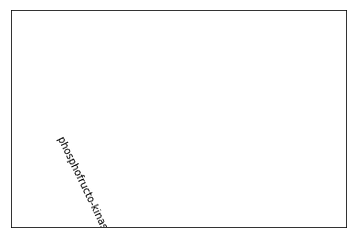

In [57]:
nx.draw_networkx_edge_labels(G, position, edge_labels = new_labels)
